In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
path = '/content/Stock_data.csv'
df_stock = pd.read_csv(path,)
print(df_stock.head())

                  Gmt time      Volume     Open      High       Low     Close
0  12.12.2012 00:00:00.000  11011.3902  1.23492  1.235890  1.233830  1.235200
1  12.12.2012 04:00:00.000  13271.5599  1.23521  1.235510  1.233860  1.234340
2  12.12.2012 08:00:00.000  26716.2305  1.23435  1.236370  1.233305  1.234905
3  12.12.2012 12:00:00.000  28430.1602  1.23491  1.237285  1.234850  1.236810
4  12.12.2012 16:00:00.000  33124.1904  1.23680  1.238700  1.236285  1.238205


In [18]:
print(df_stock.columns)


Index(['Gmt time', 'Volume', 'Open', 'High', 'Low', 'Close'], dtype='object')


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


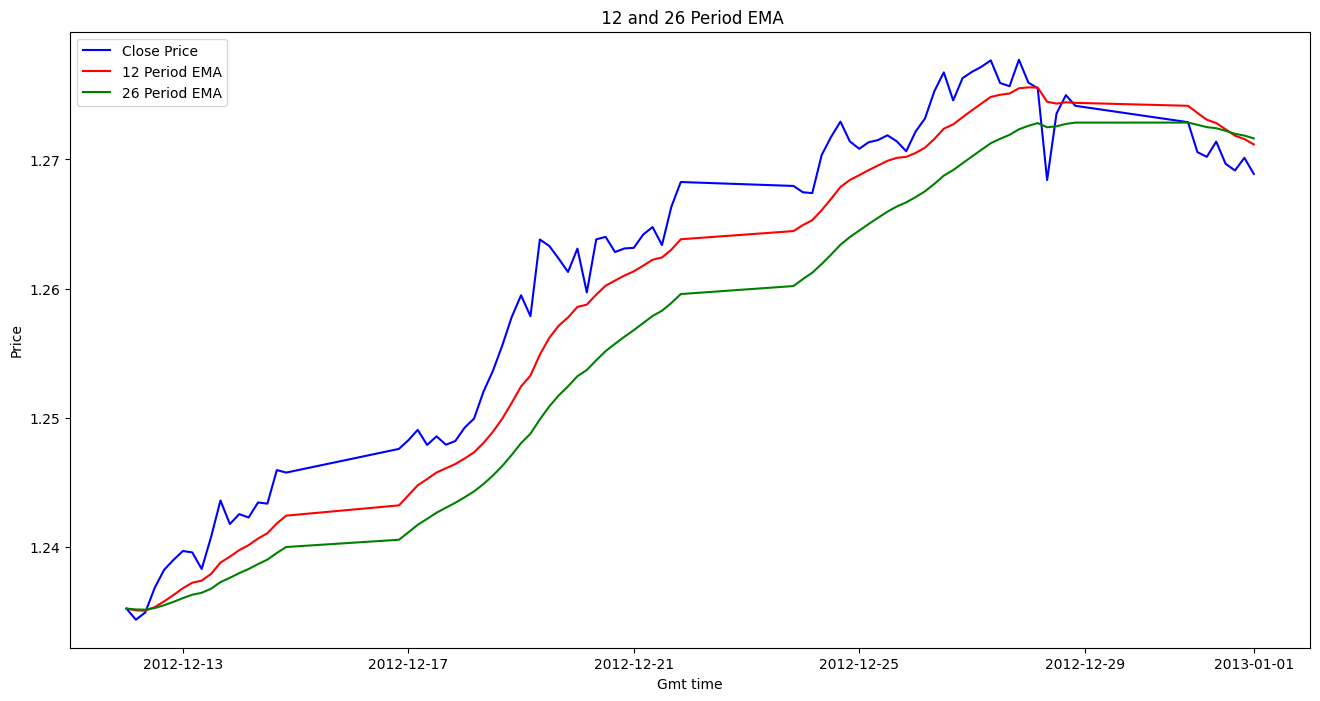

In [19]:
#  1) Ask user for start date and end date between that period calculate. 12-period EMA and 26-period EMA are two moving averages. Calculate them
# and plot These two with Close price in a line chart

df_stock['Gmt time'] = pd.to_datetime(df_stock['Gmt time'])

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['12_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['26_period_EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12_period_EMA'], label='12 Period EMA', color='red')
plt.plot(filtered_df['Gmt time'], filtered_df['26_period_EMA'], label='26 Period EMA', color='green')
plt.title(' 12 and 26 Period EMA')
plt.legend()
plt.xlabel('Gmt time')
plt.ylabel('Price')
plt.grid(False)
plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


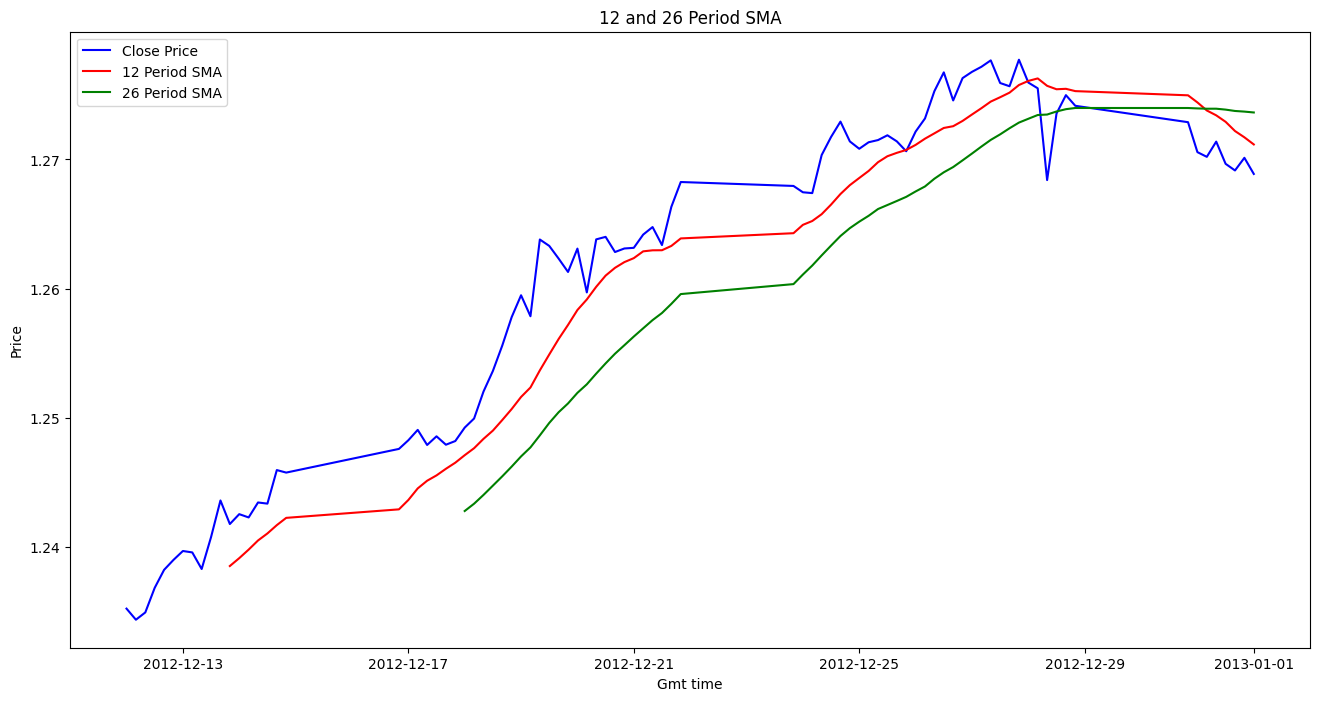

In [ ]:
# 2) Ask user for start date and end date between that period calculate. 12-period SMA and 26-period SMA
# are two moving averages. Calculate them and plot These two with Close price in a line chart

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['12_period_SMA'] = filtered_df['Close'].rolling(window=12).mean()
filtered_df['26_period_SMA'] = filtered_df['Close'].rolling(window=26).mean()

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12_period_SMA'], label='12 Period SMA', color='red')
plt.plot(filtered_df['Gmt time'], filtered_df['26_period_SMA'], label='26 Period SMA', color='green')
plt.title('12 and 26 Period SMA')
plt.legend()
plt.xlabel('Gmt time')
plt.ylabel('Price')
plt.grid(False)
plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


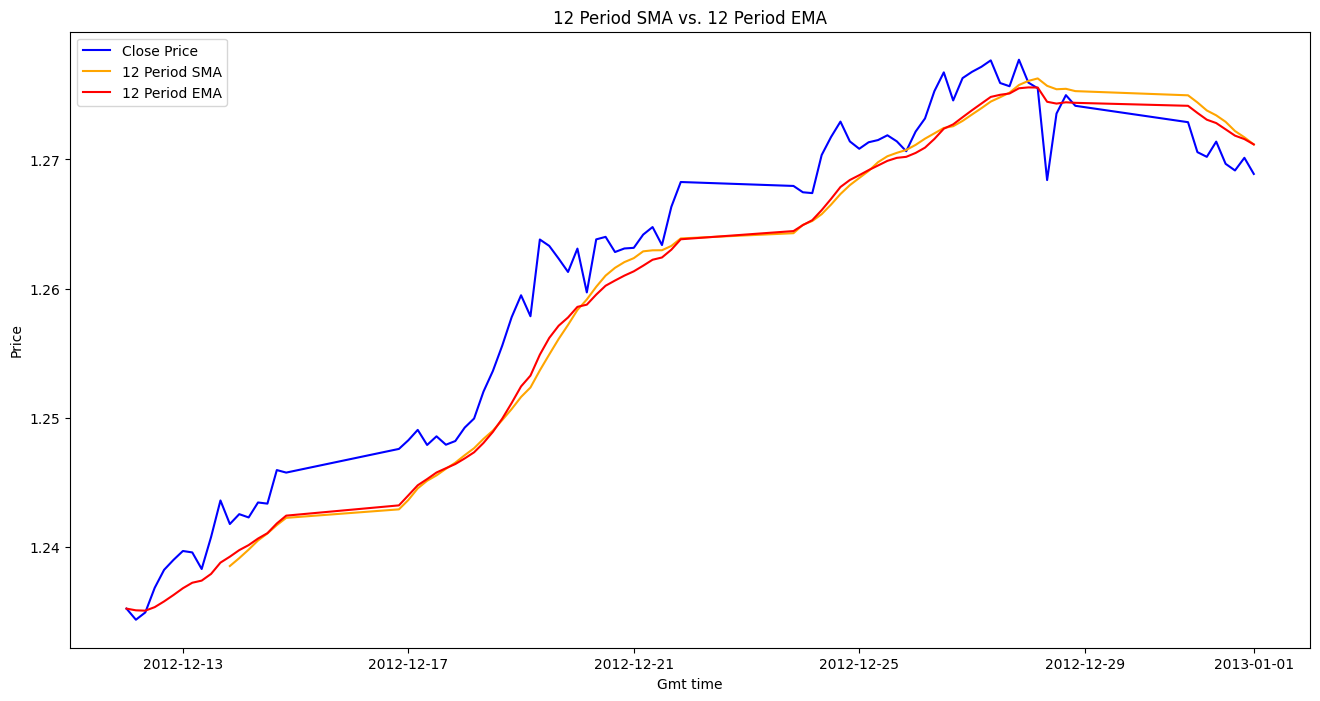

In [20]:
# a)  compare SMA 12 EMA 12 and CLOSE

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['12_period_SMA'] = filtered_df['Close'].rolling(window=12).mean()

filtered_df['12_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['12_period_SMA'], label='12 Period SMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['12_period_EMA'], label='12 Period EMA', color='red')
plt.title('12 Period SMA vs. 12 Period EMA')
plt.legend()
plt.xlabel('Gmt time')
plt.ylabel('Price')
plt.grid(False)
plt.show()



Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


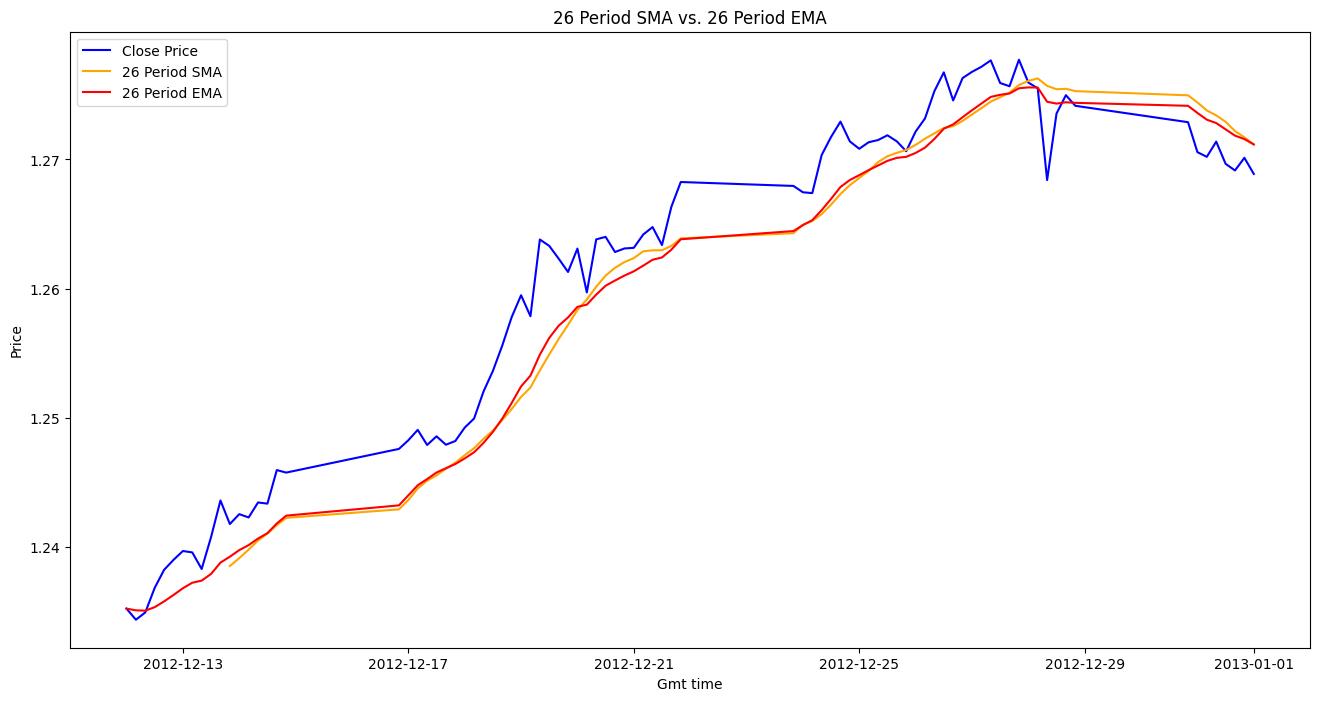

In [21]:
# b) compare SMA 26 EMA 26 and CLOSE

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['26_period_SMA'] = filtered_df['Close'].rolling(window=12).mean()

filtered_df['26_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['26_period_SMA'], label='26 Period SMA', color='orange')
plt.plot(filtered_df['Gmt time'], filtered_df['26_period_EMA'], label='26 Period EMA', color='red')
plt.title('26 Period SMA vs. 26 Period EMA')
plt.legend()
plt.xlabel('Gmt time')
plt.ylabel('Price')
plt.grid(False)
plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


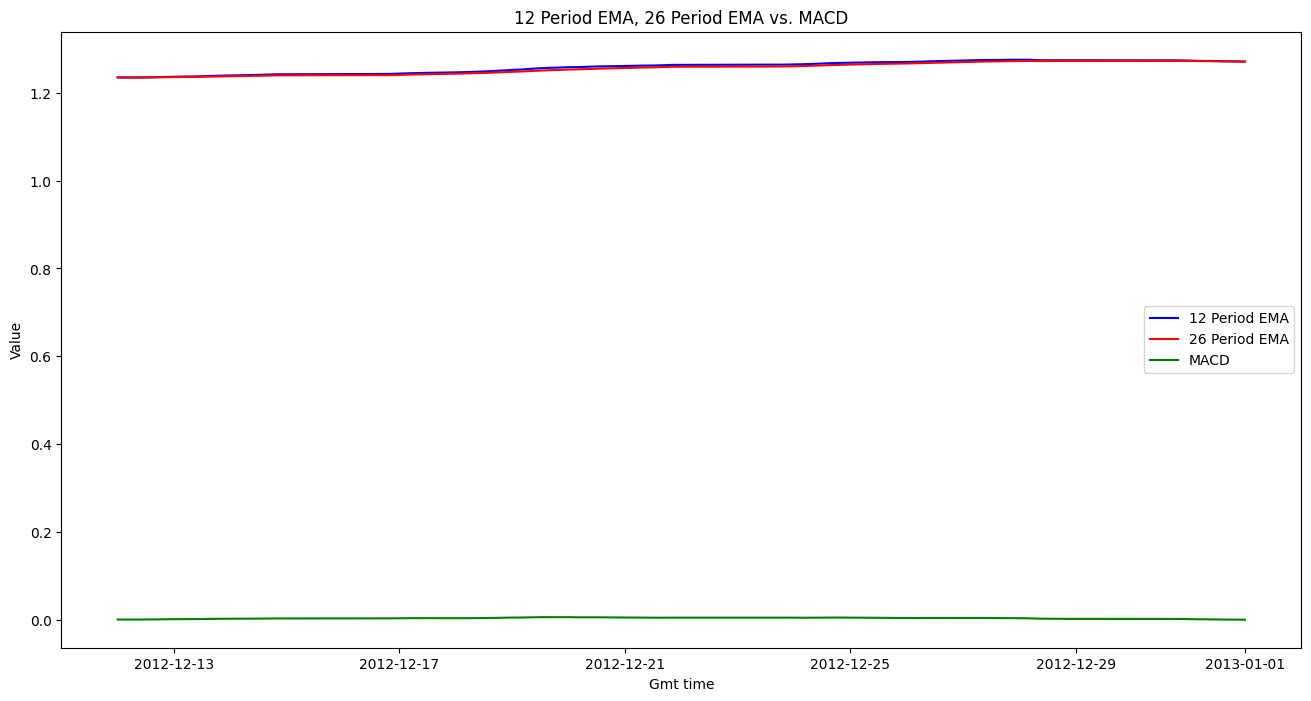

In [22]:
#3) calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

# User input for start and end dates
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['12_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['26_period_EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()

filtered_df['MACD'] = filtered_df['12_period_EMA'] - filtered_df['26_period_EMA']

plt.figure(figsize=(16, 8))
plt.plot(filtered_df['Gmt time'], filtered_df['12_period_EMA'], label='12 Period EMA', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['26_period_EMA'], label='26 Period EMA', color='red')
plt.plot(filtered_df['Gmt time'], filtered_df['MACD'], label='MACD', color='green')
plt.title('12 Period EMA, 26 Period EMA vs. MACD')
plt.legend()
plt.xlabel('Gmt time')
plt.ylabel('Value')
plt.grid(False)
plt.show()


#**Subplots***

Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


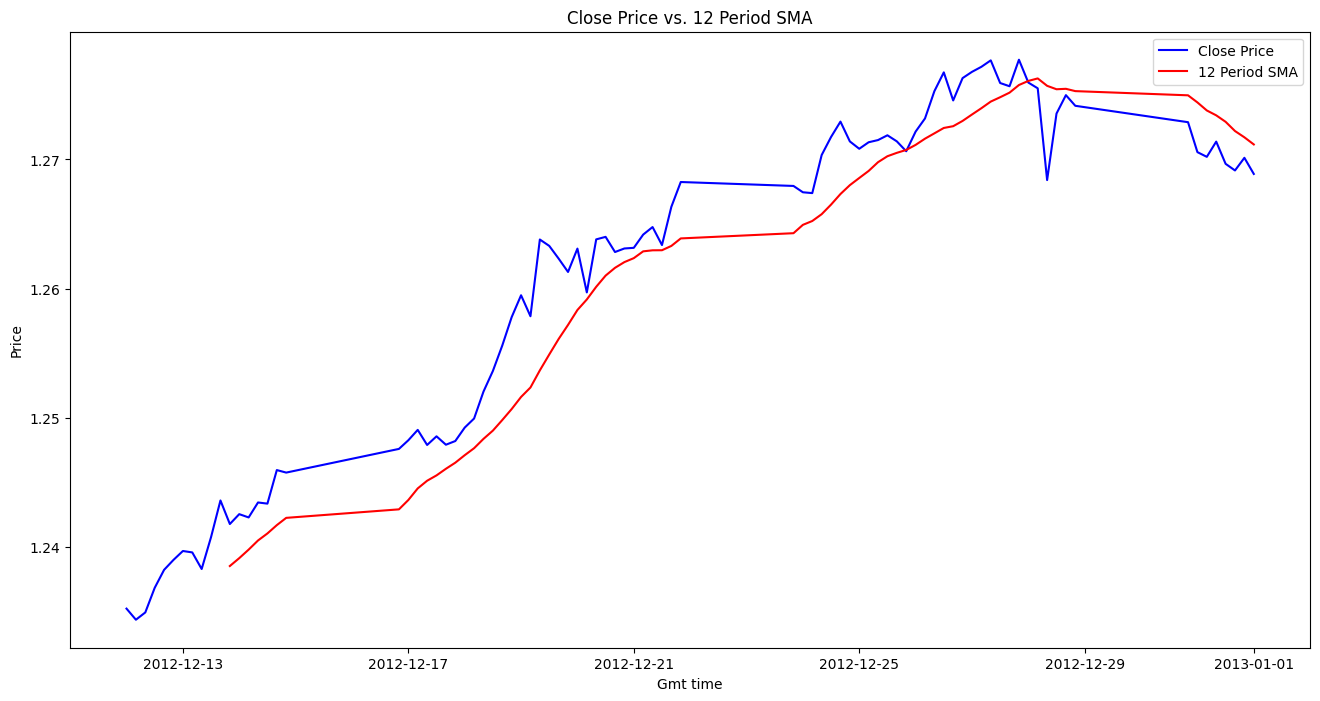

In [ ]:
# 1) SMA 12 vs close

#User date input
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['12_period_SMA'] = filtered_df['Close'].rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(16, 8))

# Plot Close prices
ax.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# Plot SMA 12
ax.plot(filtered_df['Gmt time'], filtered_df['12_period_SMA'], label='12 Period SMA', color='red')

ax.set_title('Close Price vs. 12 Period SMA')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('Price')
ax.grid(False)

plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


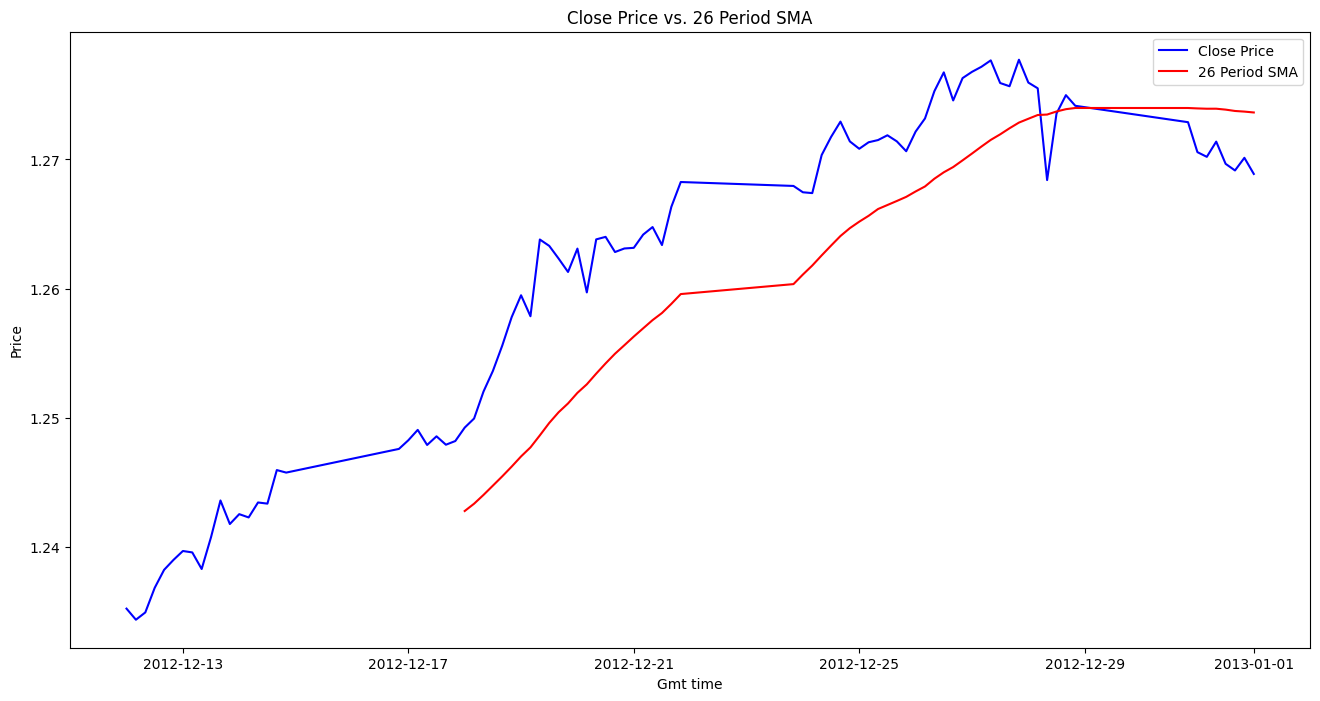

In [ ]:
# 2) SMA 26 vs close
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['26_period_SMA'] = filtered_df['Close'].rolling(window=26).mean()

fig, ax = plt.subplots(figsize=(16, 8))

# Plot Close prices
ax.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# Plot SMA 12
ax.plot(filtered_df['Gmt time'], filtered_df['26_period_SMA'], label='26 Period SMA', color='red')

ax.set_title('Close Price vs. 26 Period SMA')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('Price')
ax.grid(False)

plt.show()

Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


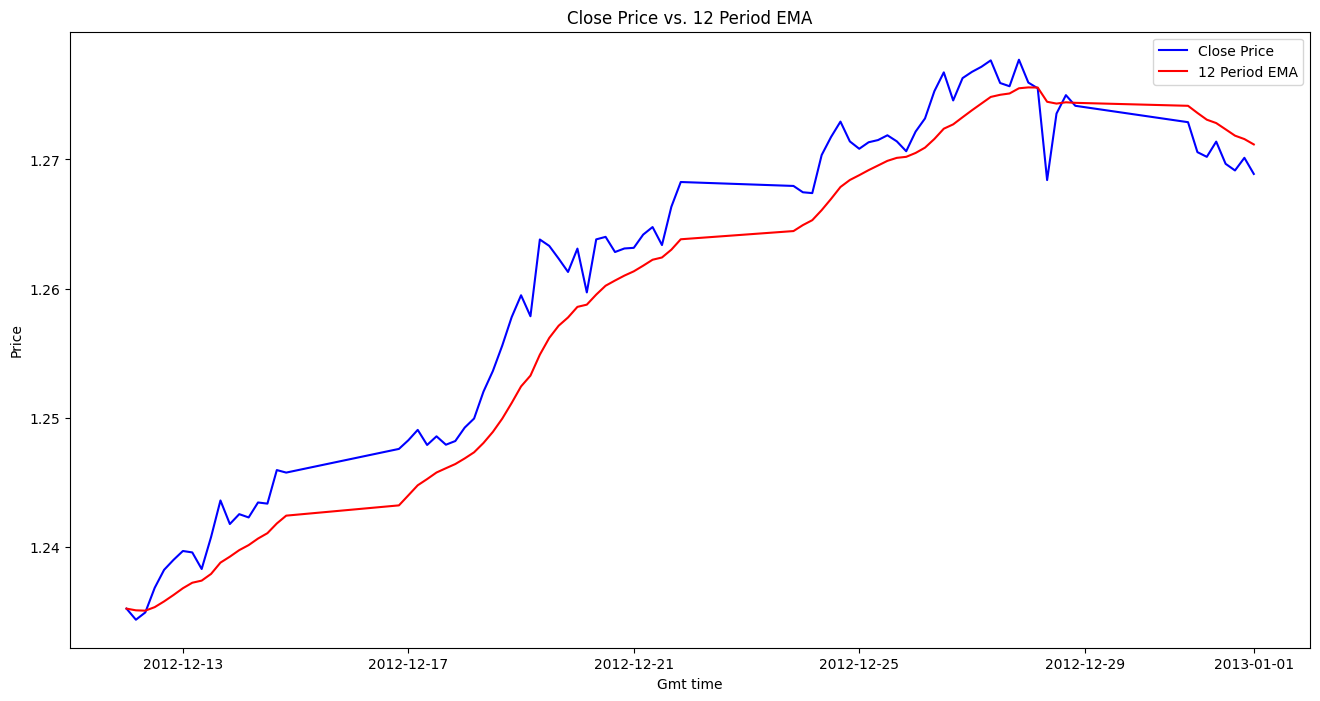

In [23]:
# 3) EMA 12 vs close

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['12_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()

fig, ax = plt.subplots(figsize=(16, 8))

# Plot Close prices
ax.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# Plot 12-period EMA
ax.plot(filtered_df['Gmt time'], filtered_df['12_period_EMA'], label='12 Period EMA', color='red')

ax.set_title('Close Price vs. 12 Period EMA')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('Price')
ax.grid(False)

plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


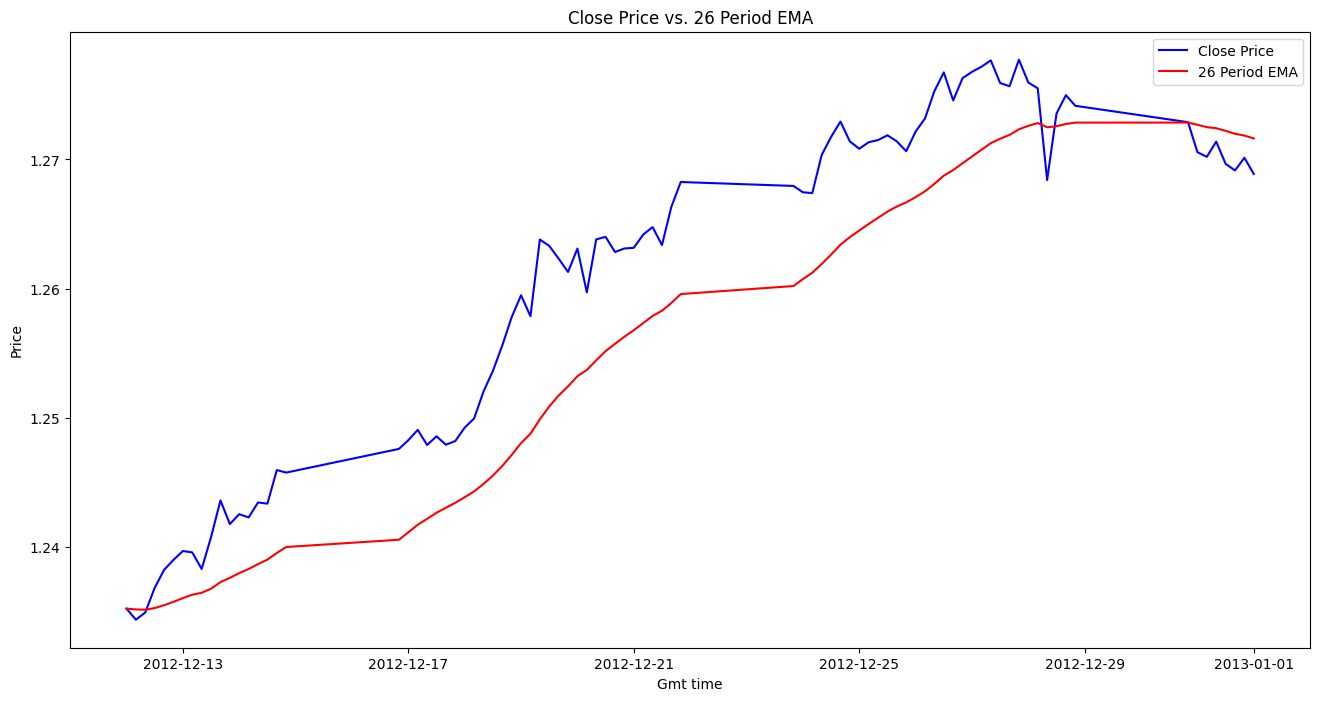

In [24]:
# 4) EMA 26 vs close

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

filtered_df['26_period_EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()

fig, ax = plt.subplots(figsize=(16, 8))

# Plot Close prices
ax.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# Plot 12-period EMA
ax.plot(filtered_df['Gmt time'], filtered_df['26_period_EMA'], label='26 Period EMA', color='red')

ax.set_title('Close Price vs. 26 Period EMA')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('Price')
ax.grid(False)

plt.show()

Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


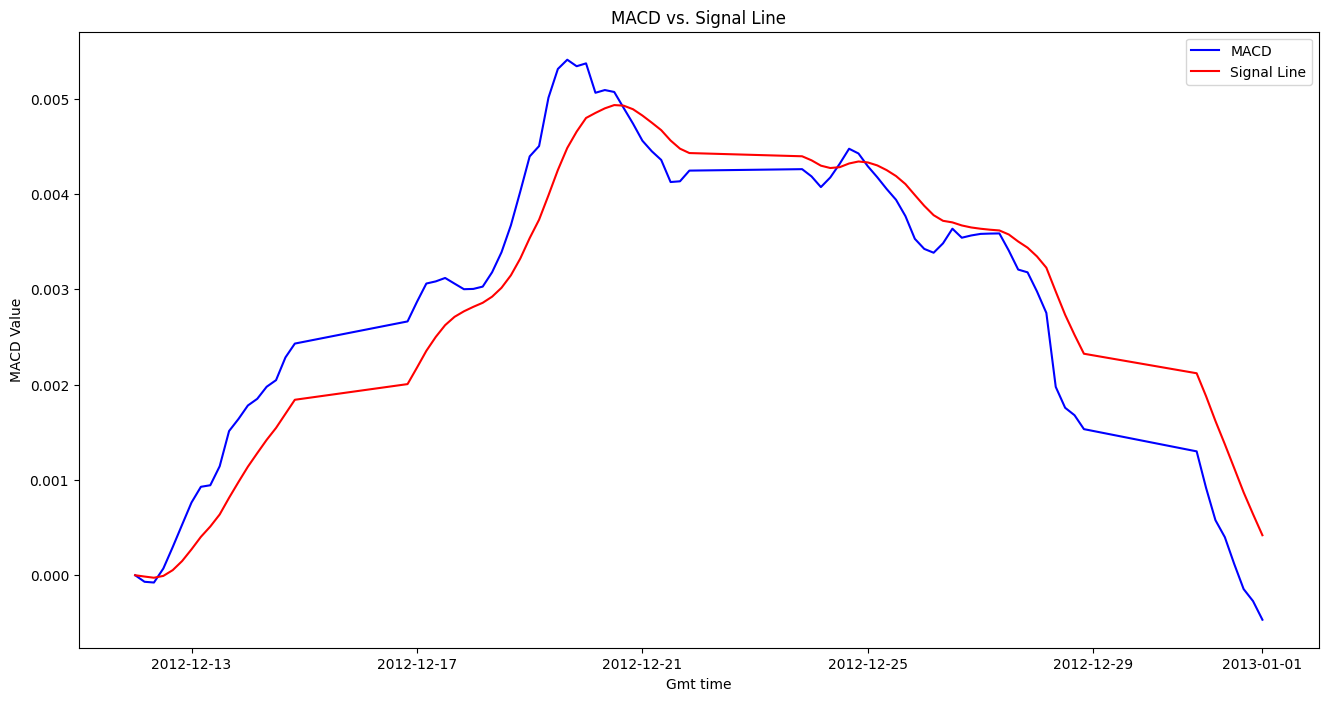

In [25]:
# 5) MACD

start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

# MACD and Signal Line indicators
filtered_df['12_period_EMA'] = filtered_df['Close'].ewm(span=12, adjust=False).mean()
filtered_df['26_period_EMA'] = filtered_df['Close'].ewm(span=26, adjust=False).mean()
filtered_df['MACD'] = filtered_df['12_period_EMA'] - filtered_df['26_period_EMA']
filtered_df['Signal_Line'] = filtered_df['MACD'].ewm(span=9, adjust=False).mean()

fig, ax = plt.subplots(figsize=(16, 8))

# Plot MACD
ax.plot(filtered_df['Gmt time'], filtered_df['MACD'], label='MACD', color='blue')
# Plot Signal Line
ax.plot(filtered_df['Gmt time'], filtered_df['Signal_Line'], label='Signal Line', color='red')

ax.set_title('MACD vs. Signal Line')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('MACD Value')
ax.grid(False)

plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


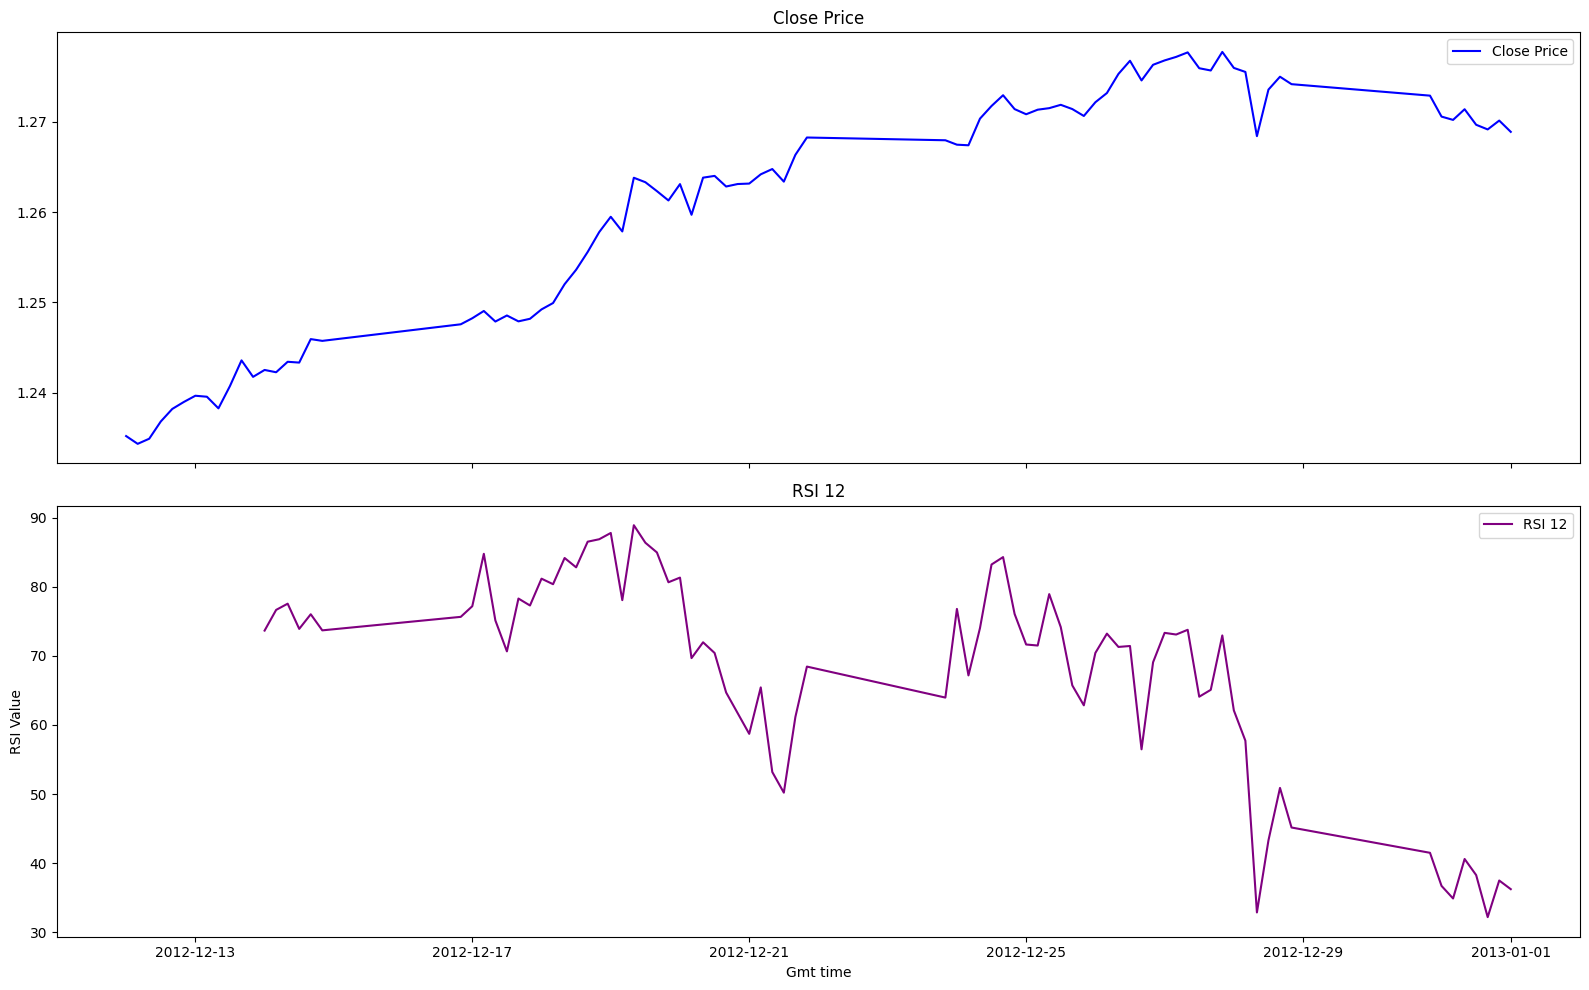

In [41]:

# 6) RSI 12 vs close

def compute_rsi(data, window=12):
    delta = data.diff()
    delta = delta.dropna()

    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    roll_up = up.rolling(window).mean()
    roll_down = down.abs().rolling(window).mean()

    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))

    return RSI

# Addition of RSI to the dataframe
df_stock['RSI_12'] = compute_rsi(df_stock['Close'])

# User date input
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

# Data filtering
filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Close prices
ax1.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
ax1.set_title('Close Price')
ax1.legend()
ax1.grid(False)

#RSI_12
ax2.plot(filtered_df['Gmt time'], filtered_df['RSI_12'], label='RSI 12', color='purple')
ax2.set_title('RSI 12')
ax2.legend()
ax2.set_xlabel('Gmt time')
ax2.set_ylabel('RSI Value')
ax2.grid(False)

plt.tight_layout()
plt.show()



Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


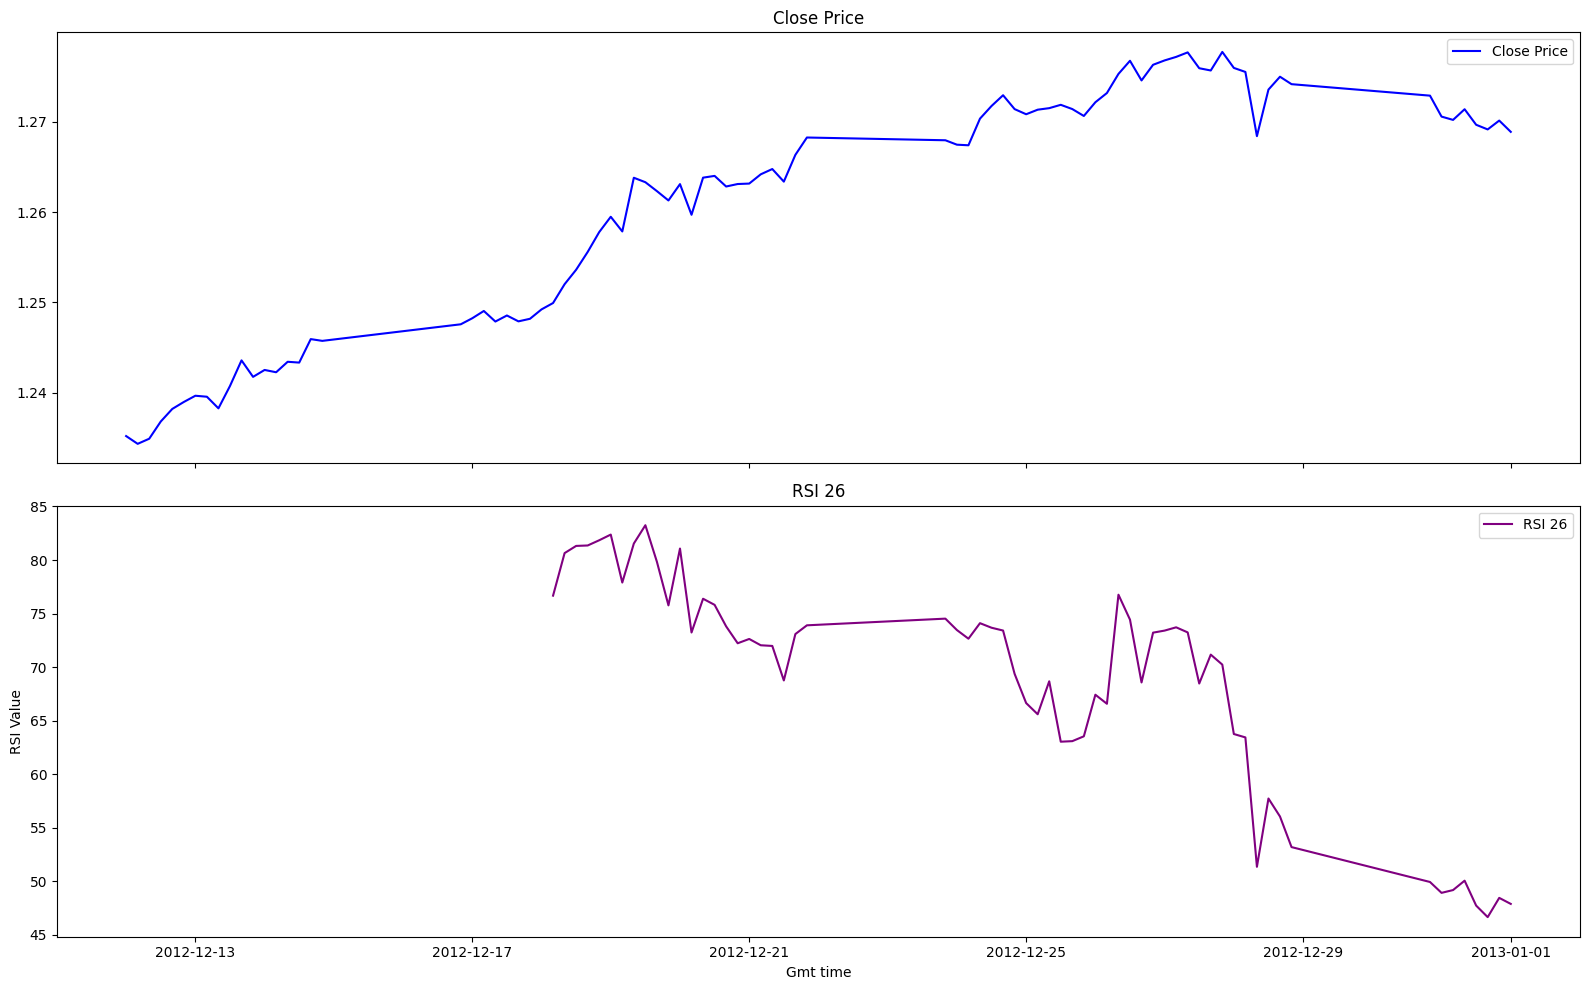

In [40]:

# 7) RSI 26 vs close

def compute_rsi(data, window=26):
    delta = data.diff()
    delta = delta.dropna()

    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    roll_up = up.rolling(window).mean()
    roll_down = down.abs().rolling(window).mean()

    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))

    return RSI

# Addiotion of RSI to the dataframe
df_stock['RSI_26'] = compute_rsi(df_stock['Close'])

# User data input
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

# Data filtering
filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Plot Close prices on the top subplot
ax1.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
ax1.set_title('Close Price')
ax1.legend()
ax1.grid(False)

ax2.plot(filtered_df['Gmt time'], filtered_df['RSI_26'], label='RSI 26', color='purple')
ax2.set_title('RSI 26')
ax2.legend()
ax2.set_xlabel('Gmt time')
ax2.set_ylabel('RSI Value')
ax2.grid(False)

plt.tight_layout()
plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


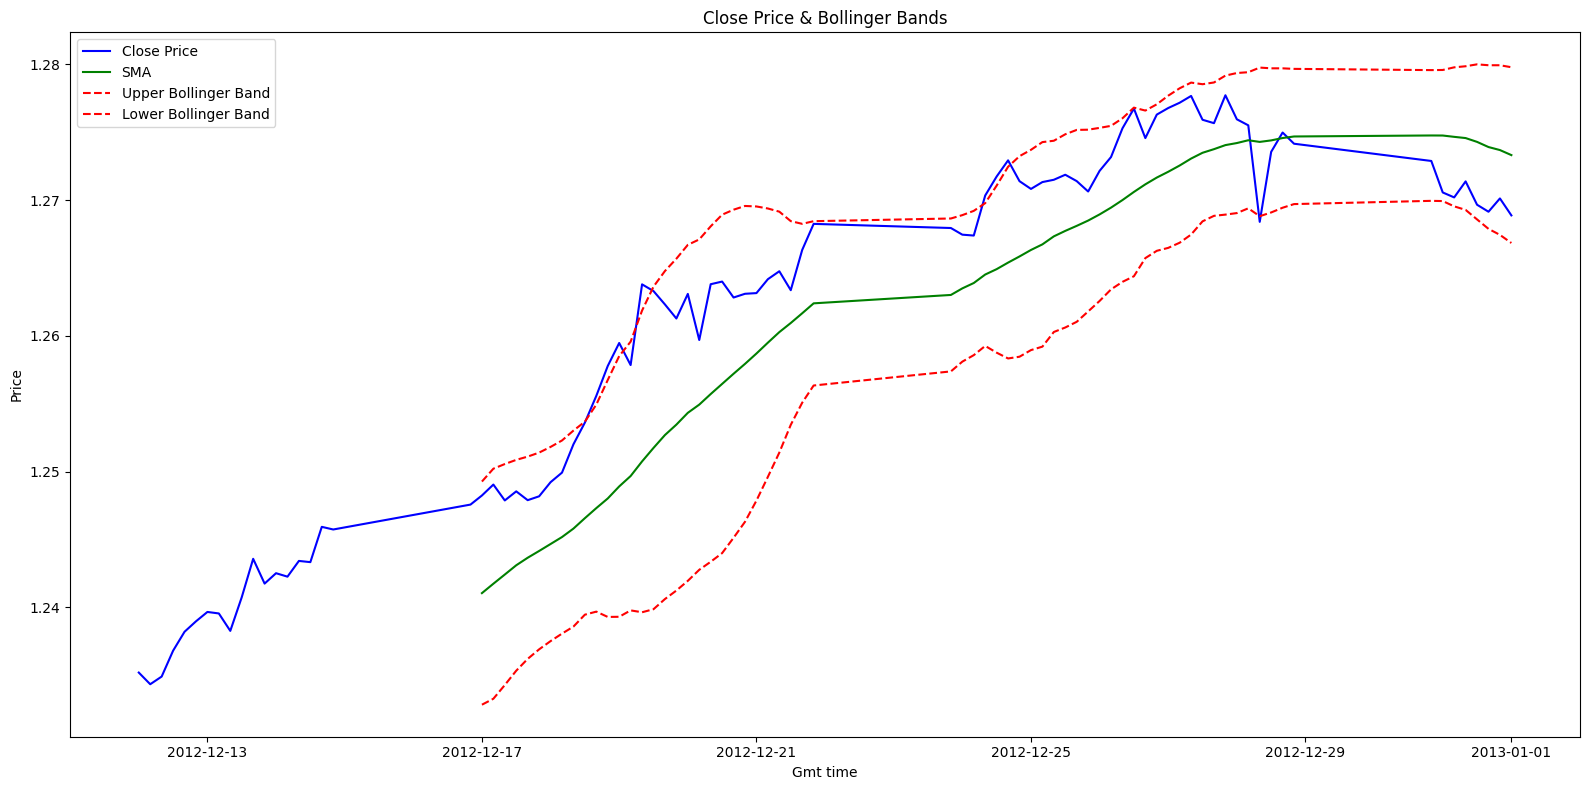

In [42]:
# 8) Bollinger bands all three vs close

# Bollinger Bands Calculation
window = 20
sma = df_stock['Close'].rolling(window=window).mean()
rolling_std = df_stock['Close'].rolling(window=window).std()
upper_band = sma + (rolling_std*2)
lower_band = sma - (rolling_std*2)

#User input
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

fig, ax = plt.subplots(figsize=(16, 8))

# Plot Close prices
ax.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# Plot SMA
ax.plot(filtered_df['Gmt time'], sma.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)], label='SMA', color='green')
# Plot Upper Bollinger Band
ax.plot(filtered_df['Gmt time'], upper_band.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)], label='Upper Bollinger Band', color='red', linestyle='--')
# Plot Lower Bollinger Band
ax.plot(filtered_df['Gmt time'], lower_band.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)], label='Lower Bollinger Band', color='red', linestyle='--')

ax.set_title('Close Price & Bollinger Bands')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('Price')
ax.grid(False)

plt.tight_layout()
plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


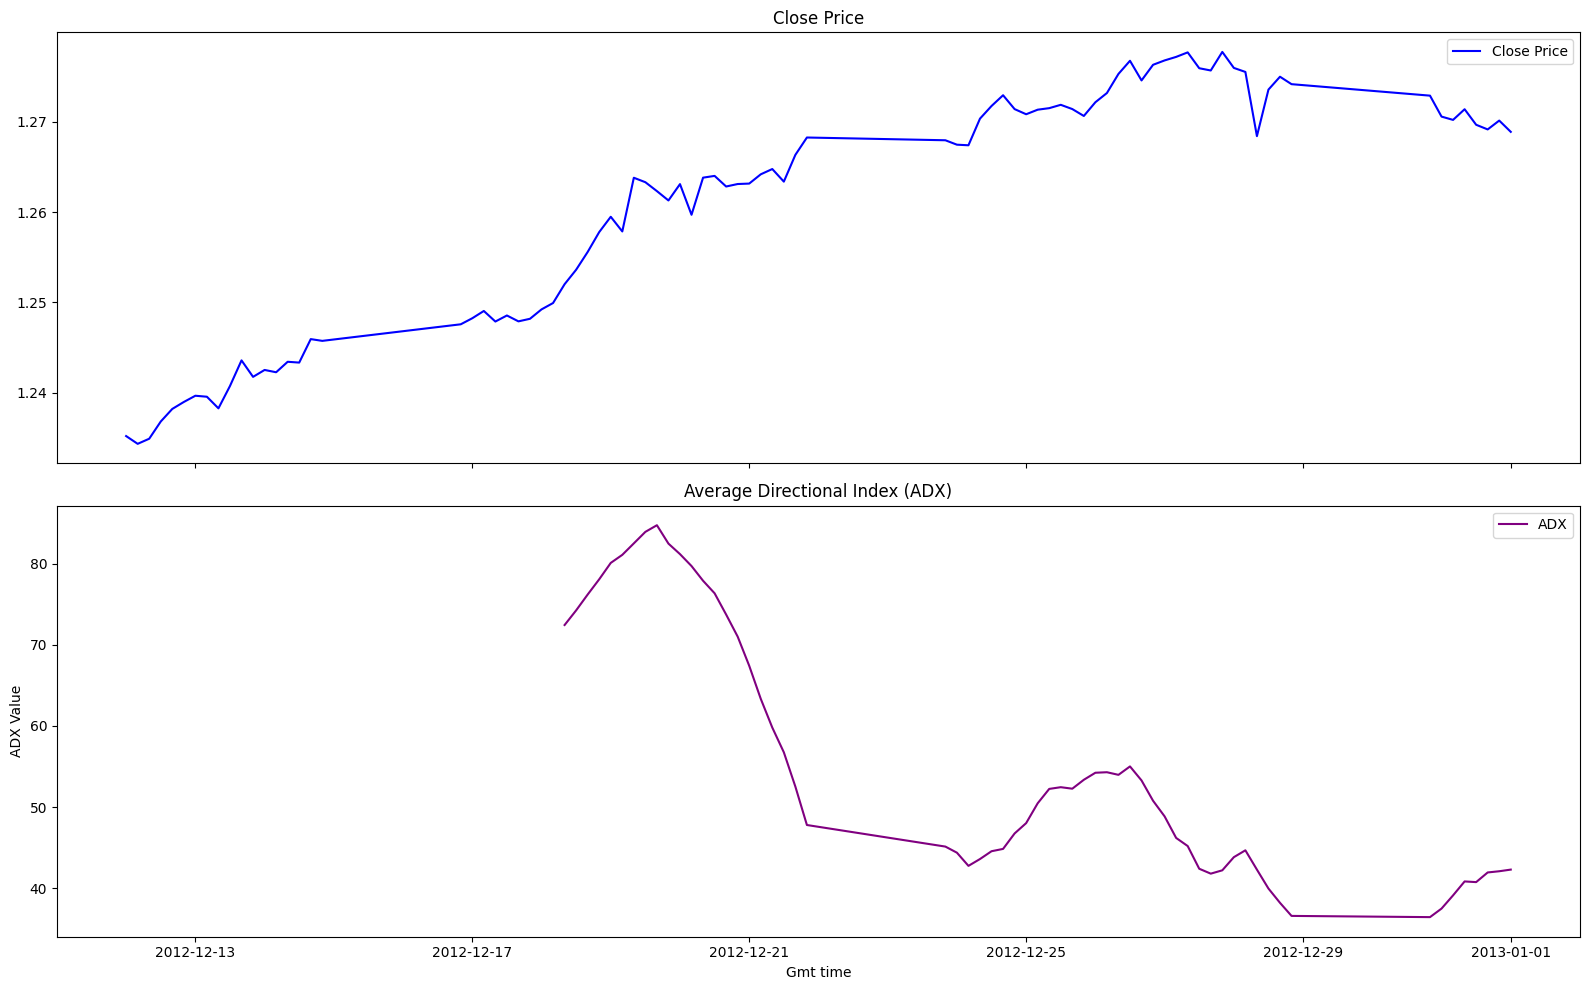

In [43]:

# 9) ADX

# Calculate Directional Movements
delta_high = df_stock['High'] - df_stock['High'].shift(1)
delta_low = df_stock['Low'].shift(1) - df_stock['Low']
pos_dm = delta_high.where(delta_high > delta_low, 0).fillna(0)
neg_dm = delta_low.where(delta_low > delta_high, 0).fillna(0)

#  True Range
tr = df_stock['High'] - df_stock['Low']
tr = tr.where(tr > abs(df_stock['High'] - df_stock['Close'].shift(1)), abs(df_stock['High'] - df_stock['Close'].shift(1)))
tr = tr.where(tr > abs(df_stock['Low'] - df_stock['Close'].shift(1)), abs(df_stock['Low'] - df_stock['Close'].shift(1)))

# data smoothing
window = 14
tr_smoothed = tr.rolling(window=window).mean()
pos_dm_smoothed = pos_dm.rolling(window=window).mean()
neg_dm_smoothed = neg_dm.rolling(window=window).mean()

#  Directional Indicators
pos_di = 100 * pos_dm_smoothed / tr_smoothed
neg_di = 100 * neg_dm_smoothed / tr_smoothed

#  ADX Calculation
adx = 100 * (abs(pos_di - neg_di) / (pos_di + neg_di)).rolling(window=window).mean()
df_stock['ADX'] = adx

# User date input
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

# Data Filtering
filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

# Subplot creation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Close prices
ax1.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
ax1.set_title('Close Price')
ax1.legend()
ax1.grid(False)

# ADX plot
ax2.plot(filtered_df['Gmt time'], filtered_df['ADX'], label='ADX', color='purple')
ax2.set_title('Average Directional Index (ADX)')
ax2.legend()
ax2.set_xlabel('Gmt time')
ax2.set_ylabel('ADX Value')
ax2.grid(False)

plt.tight_layout()
plt.show()


Please enter the start date (YYYY-MM-DD): 2012
Please enter the end date (YYYY-MM-DD): 2013


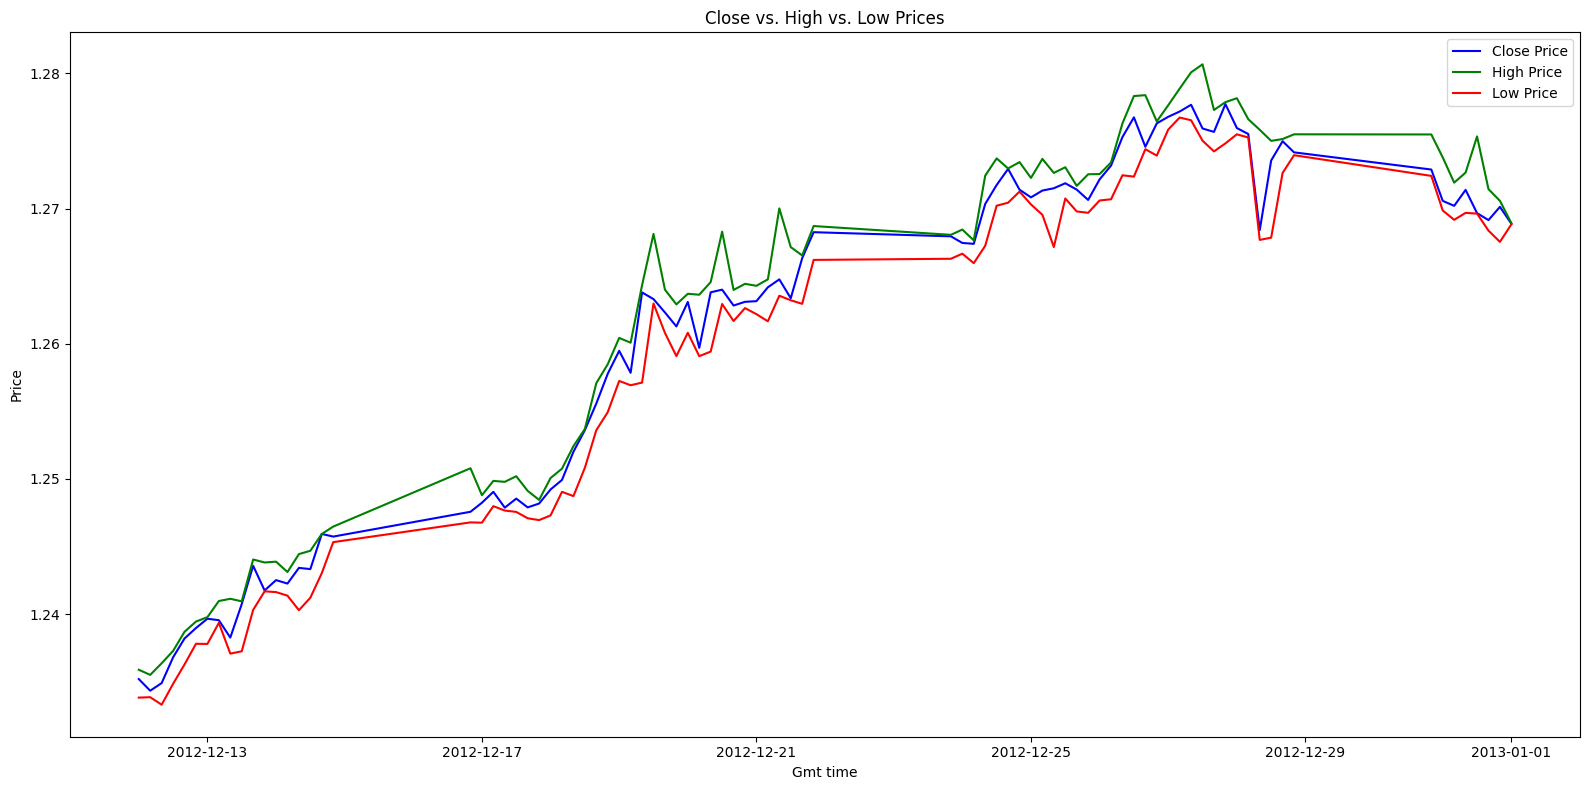

In [44]:
# 10) Close vs High vs Low

# User input of date
start_date = input("Please enter the start date (YYYY-MM-DD): ")
end_date = input("Please enter the end date (YYYY-MM-DD): ")

# Filter data
filtered_df = df_stock.loc[(df_stock['Gmt time'] >= start_date) & (df_stock['Gmt time'] <= end_date)].copy()

fig, ax = plt.subplots(figsize=(16, 8))

# Close prices
ax.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close Price', color='blue')
# High prices
ax.plot(filtered_df['Gmt time'], filtered_df['High'], label='High Price', color='green')
#  Low prices
ax.plot(filtered_df['Gmt time'], filtered_df['Low'], label='Low Price', color='red')

ax.set_title('Close vs. High vs. Low Prices')
ax.legend()
ax.set_xlabel('Gmt time')
ax.set_ylabel('Price')
ax.grid(False)

plt.tight_layout()
plt.show()
